# RFM Analysis-Clustering-PCA-A/B Testing


RFM analysis is a classic model for evaluating customer value and behavioral tendencies based on their historical behaviors (such as purchase time, frequency, and amount). It helps businesses identify high-value customers, potential customers, and churned customers, and is an important tool in precision marketing and Customer Relationship Management (CRM).

| Metric | Meaning | Calculation Method | Business Significance |
|---|---|---|---|
| R (Recency) | Number of days since the customer's last purchase | Current Date - Last Purchase Date | The smaller the value, the more active the customer |
| F (Frequency) | Number of purchases within a specific period | Count of distinct orders (or invoices) | The higher the value, the stronger the customer loyalty |
| M (Monetary) | Total consumption amount | Sum of all order amounts | The higher the value, the greater the customer value |

# __STEP 1: Data Processing__

In [61]:
import pandas as pd
import numpy as np
import datetime

df=pd.read_csv('customer_transactions_RFM.csv')

In [62]:
df

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,TotalAmount,Category,Country,Channel,Age,Gender,Membership,RegistrationDate,Occupation
0,C03649,INV126225,2025-01-29,5,19.82,99.10,Home,UK,Online,35,Female,NaN,2024-09-10,Sales
1,C04573,INV872246,2023-04-15,1,87.29,87.29,Books,India,Mobile,21,Other,NaN,2024-08-18,Sales
2,C02849,INV719176,2024-03-08,3,97.14,291.42,Electronics,USA,Online,27,Other,Silver,2023-02-22,Student
3,C07165,INV343962,2024-06-01,3,22.42,67.26,Toys,USA,Mobile,24,Female,NaN,2023-04-23,Manager
4,C06516,INV850800,2024-10-27,3,32.67,98.01,Books,China,In-store,30,Male,Gold,2023-05-14,Artist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,C17221,INV412170,2024-07-05,3,97.70,293.10,Toys,China,In-store,19,Female,Silver,2023-06-18,Engineer
199996,C18255,INV168135,2025-05-19,3,22.74,68.22,Beauty,UK,Mobile,56,Other,Silver,2024-02-20,Artist
199997,C07925,INV171285,2024-12-25,3,59.43,178.29,Beauty,Germany,Mobile,25,Male,Gold,2023-10-25,Artist
199998,C03630,INV964222,2024-06-17,3,9.09,27.27,Books,Brazil,Online,40,Male,NaN,2023-12-22,Artist


In [63]:
# Import timedelta from datetime package
from datetime import timedelta


# Convert entire column from string to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Then get the max date
maxinvoiceDate = df['InvoiceDate'].max()

# Calculate snapshot_date (snapshot_date = max invoice date + 1 day) 
snapshot_date = maxinvoiceDate + timedelta(days=1)


In [64]:
snapshot_date

Timestamp('2025-08-02 00:00:00')

In [39]:
# Create a new dataframe called rfm (recency, frequency, monetary)
rfm=df.groupby('CustomerID').agg({
'InvoiceDate':lambda x: (snapshot_date - x.max()).days, #Recency
'InvoiceNo':'nunique',#Frequency
'TotalAmount':'sum' #Monetary
})

In [40]:
rfm

,InvoiceDate,InvoiceNo,TotalAmount
CustomerID,,,
C00001,7,12,2355.48
C00002,62,13,1375.04
C00003,275,8,1156.69
C00004,70,7,1692.09
C00005,16,9,1819.42
...,...,...,...
C19996,15,12,1751.18
C19997,93,12,1441.84
C19998,9,8,1243.01


In [41]:
## change names of the rfm columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm

,Recency,Frequency,Monetary
CustomerID,,,
C00001,7,12,2355.48
C00002,62,13,1375.04
C00003,275,8,1156.69
C00004,70,7,1692.09
C00005,16,9,1819.42
...,...,...,...
C19996,15,12,1751.18
C19997,93,12,1441.84
C19998,9,8,1243.01


In [42]:
## Create R_score F_score M_score RFM_Score columns
## R_score: lower recency, higher R score ; higher frequncy, higher F score; higher monetary, higher M score
## RFM_score: Concanate R,F,M score. We do not sum them since different combinations with same summation result can't be revealed with summation method

rfm['R_score'] = pd.qcut(rfm['Recency'], 5,labels=[5,4,3,2,1]).astype(int)
rfm['F_score'] =pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5,labels=[1,2,3,4,5]).astype(int)
rfm['RFM_Score'] = rfm['R_score'].astype(str)+ rfm['F_score'].astype(str) +rfm['M_score'].astype(str)

In [43]:
rfm

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
CustomerID,,,,,,,
C00001,7,12,2355.48,5,4,5,545
C00002,62,13,1375.04,3,4,3,343
C00003,275,8,1156.69,1,2,2,122
C00004,70,7,1692.09,3,1,4,314
C00005,16,9,1819.42,5,2,4,524
...,...,...,...,...,...,...,...
C19996,15,12,1751.18,5,4,4,544
C19997,93,12,1441.84,2,4,3,243
C19998,9,8,1243.01,5,2,2,522


# __STEP 2: Exploratory Data Analysis__

<Axes: xlabel='F_score', ylabel='R_score'>

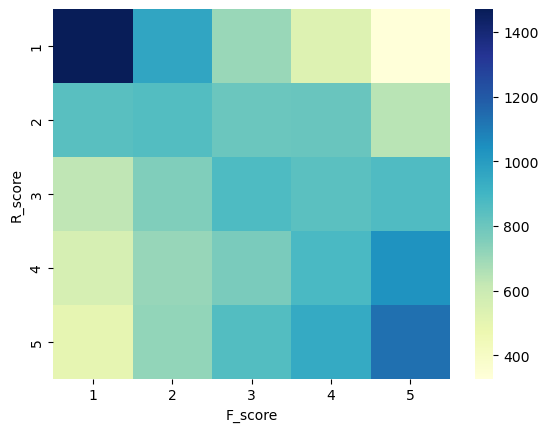

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
##热力图：客户分布在不同 R 和 F 分数的格子中
sns.heatmap(rfm.groupby(['R_score', 'F_score']).size().unstack(), cmap="YlGnBu")

_For customers who have high R_score, there are more of them having high F_score as well. For customers who have low R_score, there are more of them having low F_score as well._

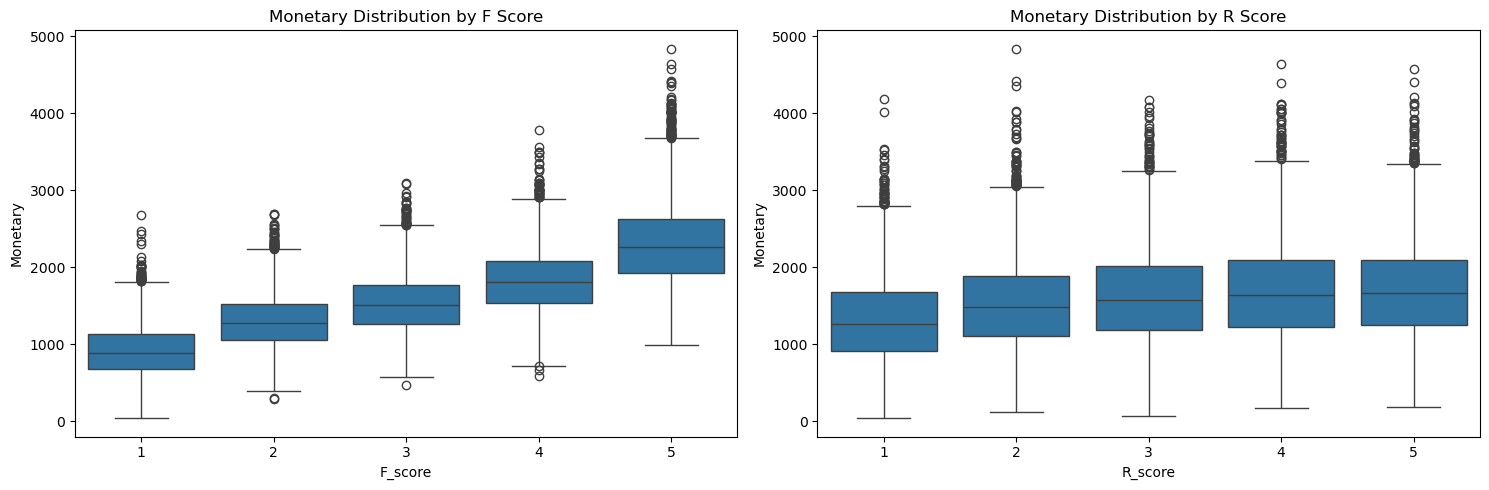

In [45]:
##Side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Left: F_score vs Monetary 箱线图：不同 F 分数的 Monetary 分布
sns.boxplot(data=rfm, x='F_score', y='Monetary', ax=ax1)
ax1.set_title('Monetary Distribution by F Score')

# Right: R_score vs Monetary   箱线图：不同 R 分数的 Monetary 分布;
sns.boxplot(data=rfm, x='R_score', y='Monetary', ax=ax2)
ax2.set_title('Monetary Distribution by R Score')

plt.tight_layout()
plt.show()

_higher F_score and R_score is associated with higher total order amount. It makes intuitive sense_

<Axes: xlabel='RFM_Class'>

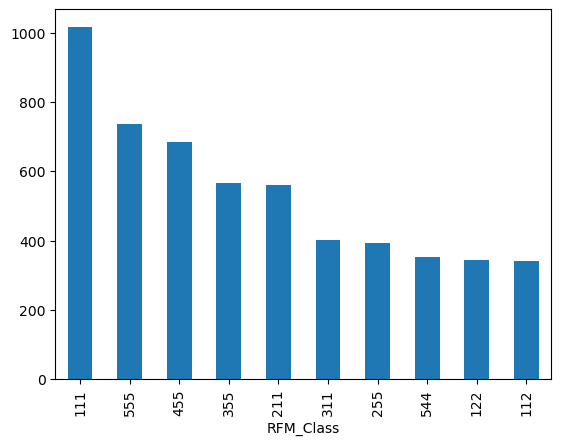

In [46]:
##柱状图：不同 RFM 分组的客户数量
rfm['RFM_Class'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm['RFM_Class'].value_counts().head(10).plot(kind='bar')

_For customers who have high R_score, there are more of them having high F_score as well. For customers who have low R_score, there are more of them having low F_score as well. '111' and '555' are the most common customer FRM Class._

# RFM Segmentation and Customer Label Examples
Customers can be categorized into multiple segments based on RFM score combination rules.

| Customer Type | Recency | Frequency | Monetary | Description | Marketing Strategy |
|---|---|---|---|---|---|
| Super Customers | High (5) | High (5) | High (5) | High activity + High frequency + High spending | Send membership rewards and exclusive offers |
| Loyal Customers | Medium | High | High | Regular purchasers with strong loyalty | Provide VIP treatment and loyalty programs |
| New Customers | High | Low | Low | Recently acquired, limited purchase history | Welcome series, onboarding guidance, and introductory offers |
| Churned Customers | Low (1) | Low | Low | Inactive for a long time, likely lost | Win-back campaigns with special discount coupons |
| Potential Customers | High | Medium | High | Recent high-value purchasers with growth potential | Push new product recommendations and cross-selling opportunities |

## Precision Marketing Strategies
- **High-value customers**: Send membership rewards and exclusive privileges
- **Potential customers**: Push new product recommendations and personalized suggestions
- **Churned customers**: Send win-back coupon offers and reactivation campaigns

## Customer Retention Analysis
- **Which groups are prone to churn?** (Low R + Low F) → User retention strategies
- **Which groups have potential to become loyal customers?** (High R + Medium F + Medium M) → Loyal customer transition strategies

# __STEP 3: Scale the Variables__

### Understanding StandardScaler

**StandardScaler** is a preprocessing utility from scikit-learn that standardizes features by removing the mean and scaling to unit variance. After transformation, each feature will have:

- Mean (μ) = 0
- Standard deviation (σ) = 1

Mathematical Transformation

For each value `x_i` in a feature column, StandardScaler applies:
- `z_i` = (`x_i` - `μ`) / `σ`


**Where:**
- `μ` = mean of the feature
- `σ` = standard deviation of the feature

This transformation centers all features around zero and ensures consistent scaling across variables.

### Equal Feature Contribution
Features with different measurement scales (e.g., recency in days, frequency as counts, monetary value in dollars) can disproportionately influence machine learning models. StandardScaler eliminates this bias by bringing all features to a common scale.

In [47]:
# Select RFM columns (Recency, Frequency, Monetary) from the dataframe
x = rfm[['Recency', 'Frequency', 'Monetary']]
x

,Recency,Frequency,Monetary
CustomerID,,,
C00001,7,12,2355.48
C00002,62,13,1375.04
C00003,275,8,1156.69
C00004,70,7,1692.09
C00005,16,9,1819.42
...,...,...,...
C19996,15,12,1751.18
C19997,93,12,1441.84
C19998,9,8,1243.01


In [48]:
# Import StandardScaler from scikit-learn preprocessing module
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform it, scaling each feature to have mean=0 and std=1
x_scaled = scaler.fit_transform(x)

# The variable x_scaled now contains the standardized RFM values, 
# which are ready to be used for clustering or other modeling tasks.
x_scaled

array([[-0.93175383,  0.63724789,  1.24604399],
       [-0.34741363,  0.95586388, -0.32357247],
       [ 1.91557663, -0.63721603, -0.67313568],
       ...,
       [-0.9105051 , -0.63721603, -0.53494335],
       [-0.4855304 ,  1.59309584,  1.51070984],
       [-0.50677914,  0.95586388,  2.16806798]])

# __STEP 4: K Means Clustering-Choosing k__

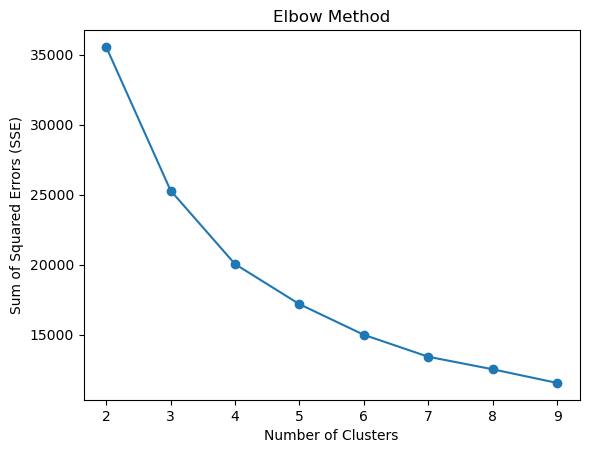

In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

sse = []  # List to store sum of squared errors for each value of k

# Loop through cluster counts from 2 to 9
for k in range(2, 10):
    # Initialize KMeans with k clusters and fixed random state for reproducibility
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model on the scaled data
    kmeans.fit(x_scaled)
    
    # Append the inertia (sum of squared distances of samples to nearest cluster center)
    sse.append(kmeans.inertia_)  # inertia_ represents total within-cluster sum of squares

# Plot the SSE vs. number of clusters
plt.plot(range(2, 10), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()


_k incerases, sse decreases. slope decreases.k=4_

The optimal number of clusters is often chosen where the "elbow" appears in the Elbow Method plot—this is the point where increasing k no longer substantially reduces the Sum of Squared Errors (SSE). In the plot, when k increases from 2 to 4, the SSE drops sharply, but after k=4, the decrease becomes much more gradual and the slope flattens. This indicates that adding more clusters beyond k=4 yields diminishing returns in terms of variance explained. Therefore, k=4 is chosen because it balances model complexity and explained variance, capturing the major structure in the data without unnecessary splitting.

# __STEP 5: Use k=4 Means Clustering to fit x_scaled__

In [50]:
# Initialize KMeans with the chosen number of clusters (4) and fixed random seed for reproducibility
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the KMeans model to the scaled data and assign cluster labels to each data point
# The result is stored as a new column 'cluster' in the rfm DataFrame
rfm['cluster'] = kmeans.fit_predict(x_scaled)
rfm

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,RFM_Class,cluster
CustomerID,,,,,,,,,
C00001,7,12,2355.48,5,4,5,545,545,0
C00002,62,13,1375.04,3,4,3,343,343,3
C00003,275,8,1156.69,1,2,2,122,122,2
C00004,70,7,1692.09,3,1,4,314,314,1
C00005,16,9,1819.42,5,2,4,524,524,3
...,...,...,...,...,...,...,...,...,...
C19996,15,12,1751.18,5,4,4,544,544,3
C19997,93,12,1441.84,2,4,3,243,243,3
C19998,9,8,1243.01,5,2,2,522,522,1


# __STEP 6: Clustering Evaluation--silhouette_score__

In [51]:
from sklearn.metrics import silhouette_score

# Calculate the average silhouette score for the clustering result
# silhouette_score measures how similar an object is to its own cluster compared to other clusters
silhouette_avg = silhouette_score(x_scaled, rfm['cluster'])

# Print the average silhouette score rounded to 2 decimal places
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.31


A Silhouette Score of 0.31 indicates a weak clustering structure overall. Here is the interpretation:

- The silhouette score ranges from -1 to +1, where values close to +1 imply well-separated and dense clusters.
- Scores around 0 indicate data points are near cluster boundaries.
- Scores below 0 suggest some points may be assigned to the wrong cluster.
- A value of 0.31 means the clusters are somewhat separated but not very distinct; it suggests moderate cluster cohesion and separation.
- Often, scores above 0.5 are considered reasonable clustering, while scores above 0.7 are strong.
- For high-dimensional or complex data, lower scores like 0.31 can still be acceptable, but it signals the clustering could be improved or that the natural clusters may be weakly defined in the data.

_In summary, a silhouette score of 0.31 implies the clustering works but is relatively weak, indicating modest separation and cohesion between clusters._

# __STEP 6: PCA Dimension Reduction__

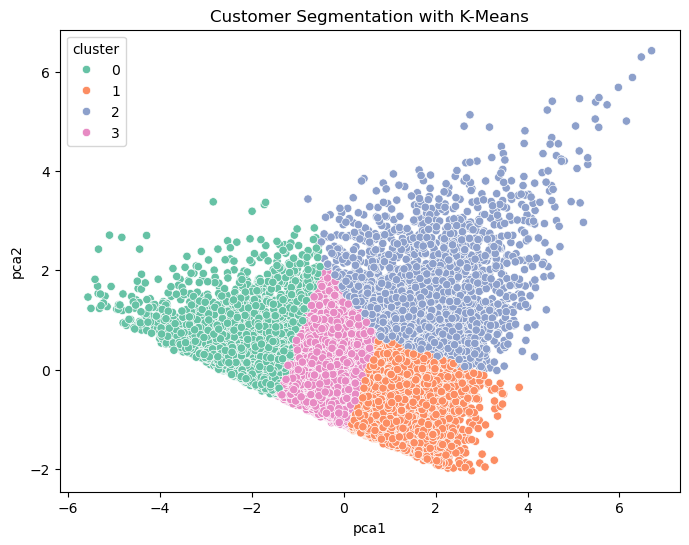

In [52]:
from sklearn.decomposition import PCA

# Initialize PCA to reduce data dimensions to 2 components for visualization
pca = PCA(n_components=2)

# Fit PCA on scaled data and transform it to get the first 2 principal components
x_pca = pca.fit_transform(x_scaled)

# Add the principal component scores as new columns in the rfm DataFrame
rfm['pca1'] = x_pca[:, 0]  # First principal component
rfm['pca2'] = x_pca[:, 1]  # Second principal component

# Create a figure with specified size for clear visualization
plt.figure(figsize=(8, 6))

# Scatter plot of the two principal components colored by cluster assignments
sns.scatterplot(data=rfm, x='pca1', y='pca2', hue='cluster', palette='Set2')

# Add a title to the plot
plt.title('Customer Segmentation with K-Means')

# Show the plot
plt.show()


In [53]:
x_scaled

array([[-0.93175383,  0.63724789,  1.24604399],
       [-0.34741363,  0.95586388, -0.32357247],
       [ 1.91557663, -0.63721603, -0.67313568],
       ...,
       [-0.9105051 , -0.63721603, -0.53494335],
       [-0.4855304 ,  1.59309584,  1.51070984],
       [-0.50677914,  0.95586388,  2.16806798]])

In [54]:
x

,Recency,Frequency,Monetary
CustomerID,,,
C00001,7,12,2355.48
C00002,62,13,1375.04
C00003,275,8,1156.69
C00004,70,7,1692.09
C00005,16,9,1819.42
...,...,...,...
C19996,15,12,1751.18
C19997,93,12,1441.84
C19998,9,8,1243.01


In [55]:
cluster_summary=rfm.groupby('cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)
cluster_summary

,Recency,Frequency,Monetary
cluster,,,
0,60.0,14.4,2490.0
1,75.1,7.2,1012.4
2,291.4,7.4,1146.0
3,67.0,10.7,1681.6


| Cluster                             | 特征总结                       | 可能的客户类型      | 营销建议                                      |
| ----------------------------------- | -------------------------- | ------------ | ----------------------------------------- |
| **0**<br>(R=60.0, F=14.4, M=2490.0) | 最近消费天数低（活跃），购买频率很高，金额最高    | **核心高价值客户**  | 维护忠诚度：会员专属优惠、提前体验新产品、定制化服务。避免流失，这类人是营收核心。 |
| **1**<br>(R=75.1, F=7.2, M=1012.4)  | 活跃度还可以（刚过两个月），频次中等，金额中等    | **中高价值活跃客户** | 可培养为核心客户：多给促销券、产品推荐，鼓励更多购买频次。             |
| **2**<br>(R=291.4, F=7.4, M=1146.0) | 很久没买（快 10 个月），但曾经购买频次和金额中等 | **沉睡老客户**    | 唤醒营销：邮件/短信召回，限定时优惠，提醒曾买过的产品有新版本。          |
| **3**<br>(R=67.0, F=10.7, M=1681.6) | 最近消费较近，频次和金额都偏高            | **潜力高价值客户**  | 加速培养：会员积分计划、交叉销售（Cross-sell），让他们更频繁购买。    |

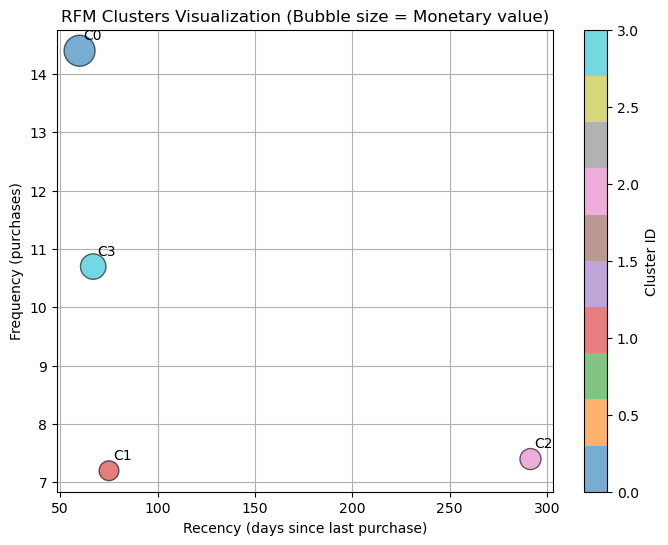

In [57]:
data = {
    'Cluster': [0, 1, 2, 3],
    'Recency': [60.0, 75.1, 291.4, 67.0],
    'Frequency': [14.4, 7.2, 7.4, 10.7],
    'Monetary': [2490.0, 1012.4, 1146.0, 1681.6]
}
df = pd.DataFrame(data)

# 气泡大小
sizes = df['Monetary'] / 5  # 缩小比例

# 绘图
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Recency'], df['Frequency'], s=sizes, alpha=0.6, c=df['Cluster'], cmap='tab10', edgecolors='k')

# 添加标注
for i, row in df.iterrows():
    plt.text(row['Recency']+2, row['Frequency']+0.2, f"C{int(row['Cluster'])}", fontsize=10)

plt.xlabel("Recency (days since last purchase)")
plt.ylabel("Frequency (purchases)")
plt.title("RFM Clusters Visualization (Bubble size = Monetary value)")
plt.colorbar(scatter, label="Cluster ID")
plt.grid(True)
plt.show()

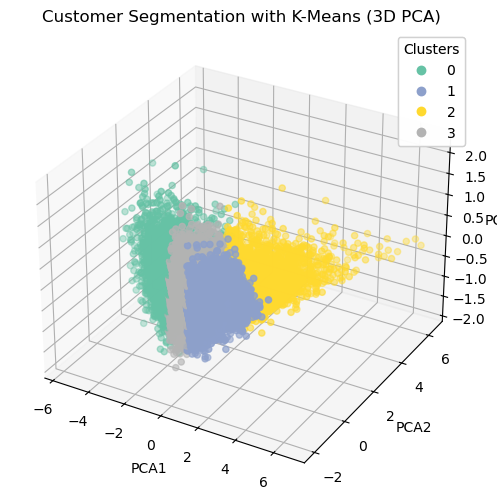

In [58]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # enables 3D plotting

# Initialize PCA with 3 components
pca = PCA(n_components=3)

# Fit PCA and transform scaled data
x_pca = pca.fit_transform(x_scaled)

# Add PCA components to DataFrame
rfm['pca1'] = x_pca[:, 0]
rfm['pca2'] = x_pca[:, 1]
rfm['pca3'] = x_pca[:, 2]

# Create 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot with color based on cluster labels
scatter = ax.scatter(rfm['pca1'], rfm['pca2'], rfm['pca3'], c=rfm['cluster'], cmap='Set2')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Set labels and title
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title('Customer Segmentation with K-Means (3D PCA)')

plt.show()


In [65]:
df

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,TotalAmount,Category,Country,Channel,Age,Gender,Membership,RegistrationDate,Occupation
0,C03649,INV126225,2025-01-29,5,19.82,99.10,Home,UK,Online,35,Female,NaN,2024-09-10,Sales
1,C04573,INV872246,2023-04-15,1,87.29,87.29,Books,India,Mobile,21,Other,NaN,2024-08-18,Sales
2,C02849,INV719176,2024-03-08,3,97.14,291.42,Electronics,USA,Online,27,Other,Silver,2023-02-22,Student
3,C07165,INV343962,2024-06-01,3,22.42,67.26,Toys,USA,Mobile,24,Female,NaN,2023-04-23,Manager
4,C06516,INV850800,2024-10-27,3,32.67,98.01,Books,China,In-store,30,Male,Gold,2023-05-14,Artist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,C17221,INV412170,2024-07-05,3,97.70,293.10,Toys,China,In-store,19,Female,Silver,2023-06-18,Engineer
199996,C18255,INV168135,2025-05-19,3,22.74,68.22,Beauty,UK,Mobile,56,Other,Silver,2024-02-20,Artist
199997,C07925,INV171285,2024-12-25,3,59.43,178.29,Beauty,Germany,Mobile,25,Male,Gold,2023-10-25,Artist
199998,C03630,INV964222,2024-06-17,3,9.09,27.27,Books,Brazil,Online,40,Male,NaN,2023-12-22,Artist


In [33]:
rfm

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,RFM_Class,cluster,pca1,pca2,pca3
0,C00001,7,12,2355.48,5,4,5,545,545,0,-1.582662,-0.321868,0.467394
1,C00002,62,13,1375.04,3,4,3,343,343,3,-0.554699,-0.207363,-0.887908
2,C00003,275,8,1156.69,1,2,2,122,122,2,1.588749,1.409667,-0.131554
3,C00004,70,7,1692.09,3,1,4,314,314,1,0.411548,-0.398822,0.829400
4,C00005,16,9,1819.42,5,2,4,524,524,3,-0.360375,-0.719873,0.550423
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,C19996,15,12,1751.18,5,4,4,544,544,3,-0.924740,-0.549109,-0.209856
19996,C19997,93,12,1441.84,2,4,3,243,243,3,-0.287495,0.058308,-0.606041
19997,C19998,9,8,1243.01,5,2,2,522,522,1,0.418009,-1.151592,0.142588
19998,C19999,49,15,2520.80,4,5,5,455,455,0,-2.213927,0.388097,-0.062003


In [66]:
import pandas as pd

df = df.reset_index()  # if CustomerID is index here
rfm = rfm.reset_index()  # if CustomerID is index here
# Merge on 'CustomerID' using an inner join to keep only matching customers
merged_df = pd.merge(df, rfm, on='CustomerID', how='inner')
merged_df

,index,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,TotalAmount,Category,Country,Channel,...,Monetary,R_score,F_score,M_score,RFM_Score,RFM_Class,cluster,pca1,pca2,pca3
0,0,C03649,INV126225,2025-01-29,5,19.82,99.10,Home,UK,Online,...,1325.92,2,2,2,222,222,1,0.585357,0.078412,-0.069945
1,1,C04573,INV872246,2023-04-15,1,87.29,87.29,Books,India,Mobile,...,1246.03,3,5,2,352,352,3,-0.388661,-0.194258,-1.036707
2,2,C02849,INV719176,2024-03-08,3,97.14,291.42,Electronics,USA,Online,...,1680.21,5,4,3,543,543,3,-0.879750,-0.653548,-0.284076
3,3,C07165,INV343962,2024-06-01,3,22.42,67.26,Toys,USA,Mobile,...,850.55,1,1,1,111,111,1,1.883059,0.044055,0.057790
4,4,C06516,INV850800,2024-10-27,3,32.67,98.01,Books,China,In-store,...,1708.20,1,2,4,124,124,2,1.034245,1.727728,0.478964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,C17221,INV412170,2024-07-05,3,97.70,293.10,Toys,China,In-store,...,1838.48,5,5,4,554,554,0,-1.415375,-0.312623,-0.572859
199996,199996,C18255,INV168135,2025-05-19,3,22.74,68.22,Beauty,UK,Mobile,...,2059.71,5,4,4,544,544,3,-1.268434,-0.451848,0.137202
199997,199997,C07925,INV171285,2024-12-25,3,59.43,178.29,Beauty,Germany,Mobile,...,1566.27,2,4,3,243,243,3,-0.169374,0.137678,-0.245363
199998,199998,C03630,INV964222,2024-06-17,3,9.09,27.27,Books,Brazil,Online,...,2084.31,4,4,5,445,445,3,-1.143472,-0.077072,0.139771


In [67]:
x2=merged_df[['Category','Country','Channel','Age','Recency','Frequency','Monetary']]
x2

,Category,Country,Channel,Age,Recency,Frequency,Monetary
0,Home,UK,Online,35,123,9,1325.92
1,Books,India,Mobile,21,70,13,1246.03
2,Electronics,USA,Online,27,8,12,1680.21
3,Toys,USA,Mobile,24,166,6,850.55
4,Books,China,In-store,30,279,8,1708.20
...,...,...,...,...,...,...,...
199995,Toys,China,In-store,19,20,14,1838.48
199996,Beauty,UK,Mobile,56,9,12,2059.71
199997,Beauty,Germany,Mobile,25,102,11,1566.27
199998,Books,Brazil,Online,40,46,12,2084.31


In [68]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

num_cols = ['Recency', 'Frequency', 'Monetary', 'Age']
cat_cols = ['Category', 'Country', 'Channel']

# Scale numerical columns
scaler = StandardScaler()
x_num_scaled = scaler.fit_transform(x2[num_cols])

# Encode categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
x_cat_encoded = encoder.fit_transform(x2[cat_cols])

# Combine scaled numerical and encoded categorical features
import numpy as np
x_processed = np.hstack([x_num_scaled, x_cat_encoded])
x_processed

array([[ 0.44919213, -0.63524333, -0.6409582 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.18399809,  0.64481819, -0.76630053, ...,  0.        ,
         1.        ,  0.        ],
       [-0.92471117,  0.32480281, -0.08509972, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.19830544,  0.00478743, -0.26386434, ...,  0.        ,
         1.        ,  0.        ],
       [-0.47072573,  0.32480281,  0.54890747, ...,  0.        ,
         0.        ,  1.        ],
       [-0.64993051,  0.64481819,  1.67956148, ...,  1.        ,
         0.        ,  0.        ]])

In [69]:
import pandas as pd

# For example, suppose you want to specify column names
# For numeric columns keep original names, for encoded columns get names from encoder

# Get encoded categorical column names from OneHotEncoder
cat_feature_names = encoder.get_feature_names_out(cat_cols)

# Combine all column names
all_columns = num_cols + list(cat_feature_names)

# Create DataFrame
x_processed_df = pd.DataFrame(x_processed, columns=all_columns)
x_processed_df

,Recency,Frequency,Monetary,Age,Category_Beauty,Category_Books,Category_Electronics,Category_Fashion,Category_Home,Category_Toys,Country_Brazil,Country_China,Country_France,Country_Germany,Country_India,Country_UK,Country_USA,Channel_In-store,Channel_Mobile,Channel_Online
0,0.449192,-0.635243,-0.640958,-0.551175,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.183998,0.644818,-0.766301,-1.481126,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.924711,0.324803,-0.085100,-1.082575,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.962912,-1.595289,-1.386783,-1.281851,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2.312922,-0.955259,-0.041185,-0.883300,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-0.781347,0.964834,0.163216,-1.613976,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
199996,-0.912764,0.324803,0.510312,0.843752,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
199997,0.198305,0.004787,-0.263864,-1.215425,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
199998,-0.470726,0.324803,0.548907,-0.219049,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


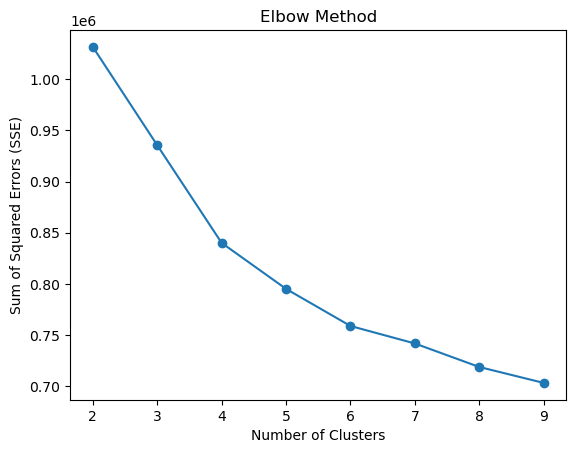

In [70]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

sse = []  # List to store sum of squared errors for each value of k

# Loop through cluster counts from 2 to 9
for k in range(2, 10):
    # Initialize KMeans with k clusters and fixed random state for reproducibility
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model on the scaled data
    kmeans.fit(x_processed)
    
    # Append the inertia (sum of squared distances of samples to nearest cluster center)
    sse.append(kmeans.inertia_)  # inertia_ represents total within-cluster sum of squares

# Plot the SSE vs. number of clusters
plt.plot(range(2, 10), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()

In [71]:
# Initialize KMeans with the chosen number of clusters (4) and fixed random seed for reproducibility
kmeans = KMeans(n_clusters=6, random_state=45)

# Fit the KMeans model to the scaled data and assign cluster labels to each data point
# The result is stored as a new column 'cluster' in the rfm DataFrame
merged_df['cluster2'] = kmeans.fit_predict(x_processed)
merged_df

,index,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,TotalAmount,Category,Country,Channel,...,R_score,F_score,M_score,RFM_Score,RFM_Class,cluster,pca1,pca2,pca3,cluster2
0,0,C03649,INV126225,2025-01-29,5,19.82,99.10,Home,UK,Online,...,2,2,2,222,222,1,0.585357,0.078412,-0.069945,0
1,1,C04573,INV872246,2023-04-15,1,87.29,87.29,Books,India,Mobile,...,3,5,2,352,352,3,-0.388661,-0.194258,-1.036707,3
2,2,C02849,INV719176,2024-03-08,3,97.14,291.42,Electronics,USA,Online,...,5,4,3,543,543,3,-0.879750,-0.653548,-0.284076,3
3,3,C07165,INV343962,2024-06-01,3,22.42,67.26,Toys,USA,Mobile,...,1,1,1,111,111,1,1.883059,0.044055,0.057790,0
4,4,C06516,INV850800,2024-10-27,3,32.67,98.01,Books,China,In-store,...,1,2,4,124,124,2,1.034245,1.727728,0.478964,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,C17221,INV412170,2024-07-05,3,97.70,293.10,Toys,China,In-store,...,5,5,4,554,554,0,-1.415375,-0.312623,-0.572859,3
199996,199996,C18255,INV168135,2025-05-19,3,22.74,68.22,Beauty,UK,Mobile,...,5,4,4,544,544,3,-1.268434,-0.451848,0.137202,2
199997,199997,C07925,INV171285,2024-12-25,3,59.43,178.29,Beauty,Germany,Mobile,...,2,4,3,243,243,3,-0.169374,0.137678,-0.245363,3
199998,199998,C03630,INV964222,2024-06-17,3,9.09,27.27,Books,Brazil,Online,...,4,4,5,445,445,3,-1.143472,-0.077072,0.139771,3


In [74]:
from sklearn.metrics import silhouette_score

# Calculate the average silhouette score for the clustering result
# silhouette_score measures how similar an object is to its own cluster compared to other clusters
silhouette_avg = silhouette_score(x_processed, merged_df['cluster2'])

# Print the average silhouette score rounded to 2 decimal places
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.10


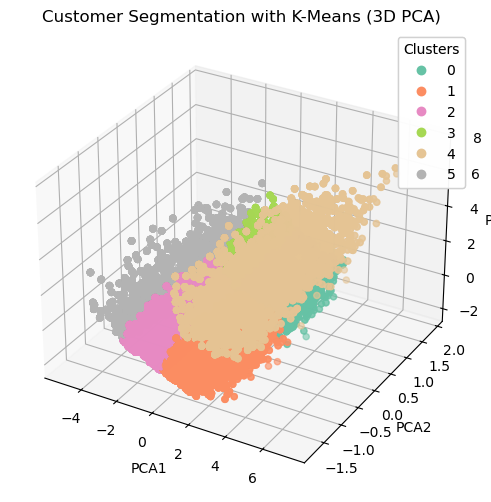

In [83]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # enables 3D plotting

# Initialize PCA with 3 components
pca = PCA(n_components=3)

# Fit PCA and transform scaled data
x2_pca = pca.fit_transform(x_processed)

# Add PCA components to DataFrame
merged_df['pca11'] = x2_pca[:, 0]
merged_df['pca22'] = x2_pca[:, 1]
merged_df['pca33'] = x2_pca[:, 2]

# Create 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot with color based on cluster labels
scatter = ax.scatter(merged_df['pca11'], merged_df['pca22'],merged_df['pca33'], c=merged_df['cluster2'], cmap='Set2')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Set labels and title
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title('Customer Segmentation with K-Means (3D PCA)')

plt.show()


# A/B Testing Stratification

## When designing experiments, stratify by RFM segments to control for confounding variables

## Detailed Explanation

### What is A/B Testing Stratification?
A/B testing stratification is an experimental design technique where you first divide your population into homogeneous subgroups (strata) based on key characteristics like RFM classification, then randomly assign subjects to treatment groups within each stratum.

### Why Use RFM Stratification?

**Problem with Simple Randomization:**
- Group A might accidentally contain more high-value customers
- Group B might have more churned users
- Results could be biased by uneven customer distribution

**Solution with Stratified Randomization:**
- Ensures balanced representation of all customer segments
- Controls for customer value as a confounding variable
- Provides more accurate and reliable results

### Implementation Steps:

1. **Segment Population** by RFM scores:
   - Super Customers (R5,F5,M5)
   - Loyal Customers (High F, Medium R, High M)
   - New Customers (High R, Low F, Low M)
   - Churned Customers (Low R, Low F/M)
   - Potential Customers (High R, Medium F, High M)

2. **Calculate Sample Size** for each RFM segment

3. **Randomly Assign** within each segment:

    - Super Customers (1,000 total)
    ├── Group A: 500 users
    └── Group B: 500 users
    
    - Loyal Customers (5,000 total)
    ├── Group A: 2,500 users
    └── Group B: 2,500 users
  

4. **Execute Experiment** and collect data

5. **Analyze Results** both overall and by RFM segment

### Benefits:

| Advantage | Description |
|-----------|-------------|
| **Reduced Bias** | Controls for customer value differences |
| **Increased Precision** | More accurate effect measurements |
| **Segment Insights** | Understand how different customer types respond |
| **Better Decision Making** | Data-driven strategies for each segment |

### Practical Example:
**Testing a new email marketing campaign:**
- Without stratification: Results might be skewed by uneven customer value distribution
- With RFM stratification: You can accurately measure campaign effectiveness for each customer type separately

### Key Takeaway:
RFM stratification ensures that your A/B test groups are comparable across all customer value dimensions, leading to more trustworthy results and better business decisions.

# RFM Analysis Common Pitfalls and Considerations

| Issue | Description |
|---|---|
| Unreasonable Time Window | RFM relies on data windows; periods that are too short or too long are inappropriate |
| Focusing Only on RFM Total Score | Some customers may have low R but high F/M, indicating they still have value |
| Ignoring Upper/Lower Limits of M | A few extreme high values can affect binning; consider using quantiles |
| Universal Application? | Suitable for frequency-based businesses (supermarkets, e-commerce); limited applicability for project-based or low-frequency high-price industries (real estate, insurance) |

# RFM Analysis Extended Applications

| Method | Application |
|---|---|
| RFM + KMeans | Automatically cluster customer behavior groups |
| RFM + LTV | Predict Customer Lifetime Value (CLV) |
| RFM + Time Series | Analyze customer activity cycles or churn trends |
| RFM + Recommendation System | Prioritize popular product recommendations for high-score customers |

# RFM Analysis Common Pitfalls and Considerations

## Data Quality Issues
| Issue | Description | Recommended Solution |
|---|---|---|
| Unreasonable Time Window | RFM results are highly dependent on the selected time period. Too short may miss patterns; too long may include outdated behaviors | Use business cycles (3-6 months for retail, 1-2 years for automotive) |
| Focusing Only on RFM Total Score | Simple averaging may hide important patterns (e.g., R=1, F=5, M=5 indicates at-risk high-value customers) | Analyze each dimension separately and use combination rules |
| Ignoring Monetary Extremes | A few whale customers can skew the entire Monetary distribution | Use quantile-based binning (percentiles) instead of equal intervals |
| Industry Applicability | Works best for frequent, moderate-value purchases; less effective for infrequent, high-value transactions | Adapt scoring rules: for luxury goods, weight M more heavily; for subscriptions, weight F more |

# Extended RFM Applications

## Advanced Analytical Methods

| Method | Application | Business Value |
|---|---|---|
| **RFM + KMeans Clustering** | Automatically identify customer segments beyond manual RFM scoring | Discovers hidden patterns and unexpected customer groups |
| **RFM + Customer Lifetime Value** | Combine historical RFM with predictive CLV models | Identify future high-value customers, not just current ones |
| **RFM + Time Series Analysis** | Track how customer segments evolve over time | Early warning for segment migration and churn prediction |
| **RFM + Recommendation Systems** | Personalize product recommendations based on customer value tiers | Optimize resource allocation for maximum ROI |

## Implementation Considerations
- **Data Quality**: Ensure consistent data collection across all customer touchpoints
- **Scoring Calibration**: Regularly review and adjust scoring thresholds based on business changes
- **Actionable Insights**: Connect RFM segments to specific marketing actions and budget allocations
- **Integration**: Combine RFM with other customer data (demographics, behavior, satisfaction scores)